### Update:
Added ppscore library : a Python implementation of the Predictive Power Score (PPS)

In [47]:
# Import basic libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# List files available
print(os.listdir("../input/"))

['nlp-getting-started', 'house-prices-advanced-regression-techniques', 'nifty50-stock-market-data', 'titanic']


In this kernel,I am trying to compile some useful Python libraries for data science tasks other than the commonly used ones like **pandas**, **scikit-learn**, **matplotlib**, etc. My idea is to regularly update the kernel to include some awesome Python libraries which can real come in handy for the Data Analysis and Machine learning tasks. The following libraries have been included :


<div class="alert alert-block alert-warning"><h3> 1. dabl(Data Analysis Baseline Library)</h3> <h3> 2. missingno </h3>
                                          <h3> 3. Emot </h3>
                                          <h3> 4. FlashText </h3>
                                          <h3> 5. PyFlux </h3>
                                          <h3> 6. Bamboolib </h3>
                                          <h3> 7. AutoViz </h3>
                                          <h3> 8. Numerizer</h3>
                                          <h3> 9. ppscore</div>


<div class="alert alert-block alert-info">
<h1> 1. dabl(Data Analysis Baseline Library)</h1></div>


**dabl** has been created by [Andreas Mueller](https://amueller.github.io/) and it tries to help make supervised machine learning more accessible for beginners, and reduce boiler plate for common tasks. Dabl takes inspirations from scikit-learn and auto-sklearn. Refer to the official [website](https://amueller.github.io/dabl/dev/index.html) for more info.



In [3]:
# Installing and loading the library
!pip install dabl

import dabl

     |████████████████████████████████| 563kB 3.5MB/s eta 0:00:01
  Created wheel for dabl: filename=dabl-0.1.8-cp36-none-any.whl size=565074 sha256=5568a3bbf36d70e7dea6a4ebfb8a2712528f30da0f8ff77f90783df488414e3c
  Stored in directory: /root/.cache/pip/wheels/99/8c/79/9d33959b9b8676bf88a2e792075a2a17eda6b1711dc0fedca3
Successfully built dabl


### 1.1 Automated Preprocessing with dabl

As part of the preprocessing,  dabl will attempt to identify missing values, feature types and erroneous data. if the detection of semantic types (continuous, categorical, ordinal, text, etc) fails, the user can provide `type_hints`. Let's demo the library with the help of the titanic dataset.

In [4]:
titanic_df = pd.read_csv('../input/titanic/train.csv')

# A first look at data
titanic_df.shape

(891, 12)

In [5]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
titanic_df_clean = dabl.clean(titanic_df, verbose=1)


Detected feature types:
2 float, 5 int, 5 object, 0 date, 0 other
Interpreted as:
continuous      2
dirty_float     0
low_card_int    2
categorical     4
date            0
free_string     3
useless         1
dtype: int64


In [7]:
types = dabl.detect_types(titanic_df_clean)
print(types) 

          continuous  dirty_float  low_card_int  categorical   date  \
Survived       False        False         False         True  False   
Pclass         False        False         False         True  False   
Name           False        False         False        False  False   
Sex            False        False         False         True  False   
Age             True        False         False        False  False   
SibSp          False        False          True        False  False   
Parch          False        False          True        False  False   
Ticket         False        False         False        False  False   
Fare            True        False         False        False  False   
Cabin          False        False         False        False  False   
Embarked       False        False         False         True  False   

          free_string  useless  
Survived        False    False  
Pclass          False    False  
Name             True    False  
Sex            

### 1.2 Exploratory Data analysis with dabl

dabl provides a high-level interface that summarizes several common high-level plots. For low dimensional datasets, all features are shown; for high dimensional datasets, only the most informative features for the given task are shown

Target looks like classification
Linear Discriminant Analysis training set score: 0.589


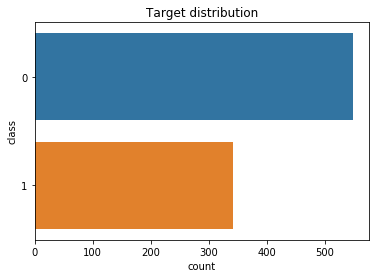

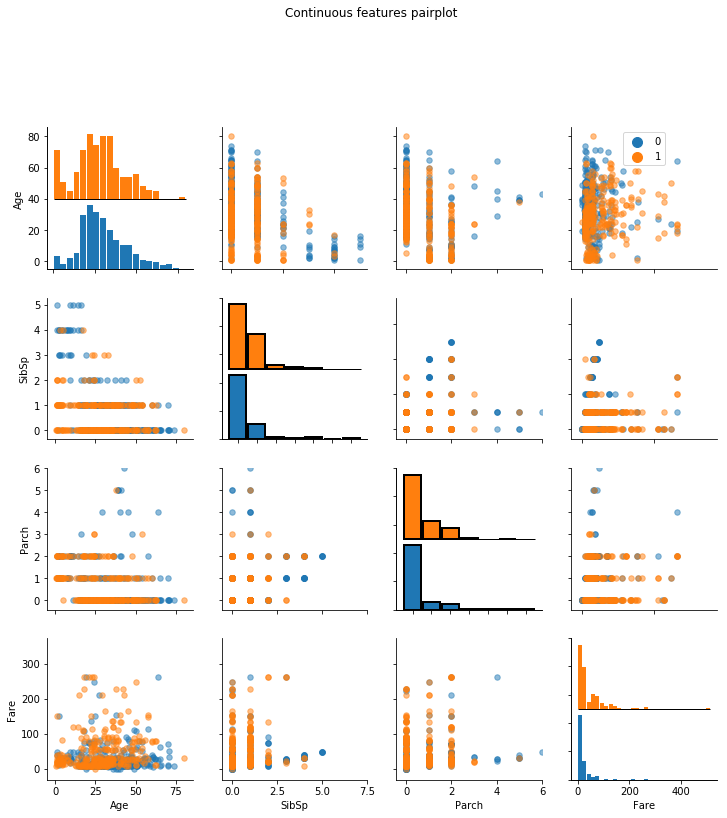

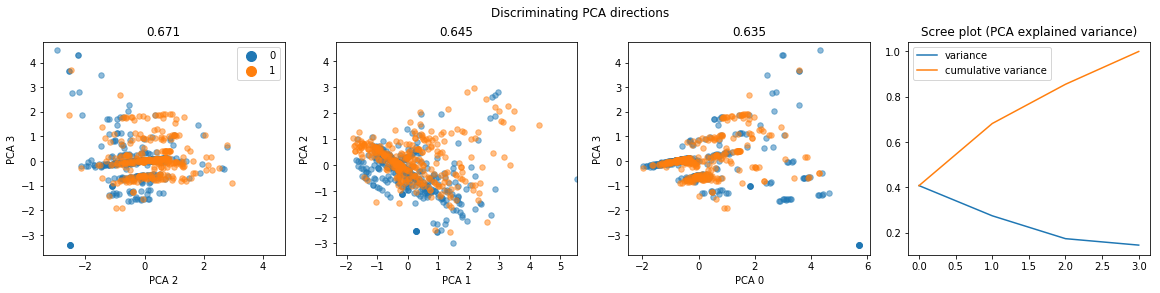

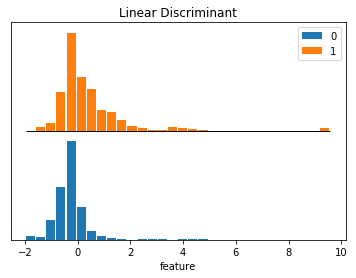

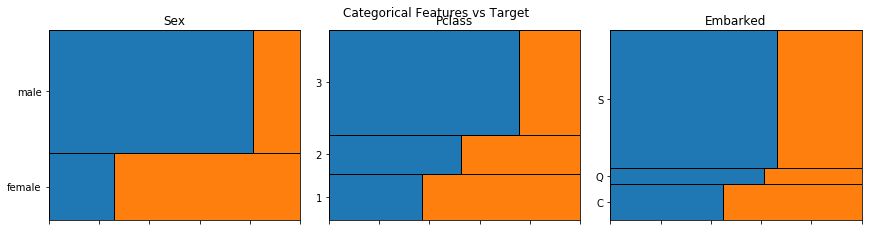

In [8]:
dabl.plot(titanic_df, target_col="Survived")

* **Initial Model Building with dabl**
We can find an initial model for our data. The SimpleClassifier implements the familiar scikit-learn API of fit and predict.

In [9]:
ec = dabl.SimpleClassifier(random_state=0).fit(titanic_df, target_col="Survived") 

Running DummyClassifier(strategy='prior')
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381

Running GaussianNB()
accuracy: 0.422 average_precision: 0.744 roc_auc: 0.820 recall_macro: 0.526 f1_macro: 0.353
=== new best GaussianNB() (using recall_macro):
accuracy: 0.422 average_precision: 0.744 roc_auc: 0.820 recall_macro: 0.526 f1_macro: 0.353

Running MultinomialNB()
accuracy: 0.774 average_precision: 0.787 roc_auc: 0.835 recall_macro: 0.752 f1_macro: 0.756
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.774 average_precision: 0.787 roc_auc: 0.835 recall_macro: 0.752 f1_macro: 0.756

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.787 average_precision: 0.630 roc_auc: 0.767 recall_macro: 0.767 f1_macro: 0.771
=== new best DecisionTreeClas

The SimpleClassifier first tries several baseline and instantaneous models, potentially on subsampled data, to get an idea of what a low baseline should be.

<div class="alert alert-block alert-info">
<h1>2. missingno </h1> </div>


Data in real life is messy and [missingno](https://github.com/ResidentMario/missingno) helps us to deal with missing values in a dataset with the help of visualisations. With over 2k stars on github, this library is already very popular.

In [10]:
# installation and importing the library
!pip install missingno
import missingno as msno

In [11]:
# Let's check out the missing values first with the train.info() method
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


clearly, the `Age`, `Cabin` and the `Embarked` column have missing values. Now lets use missingno to visualise this information.

### 2.1 Matrix

The [ matrix](https://github.com/ResidentMario/missingno#matrix) is a data-dense display which lets you quickly visually pick out patterns in data completion.

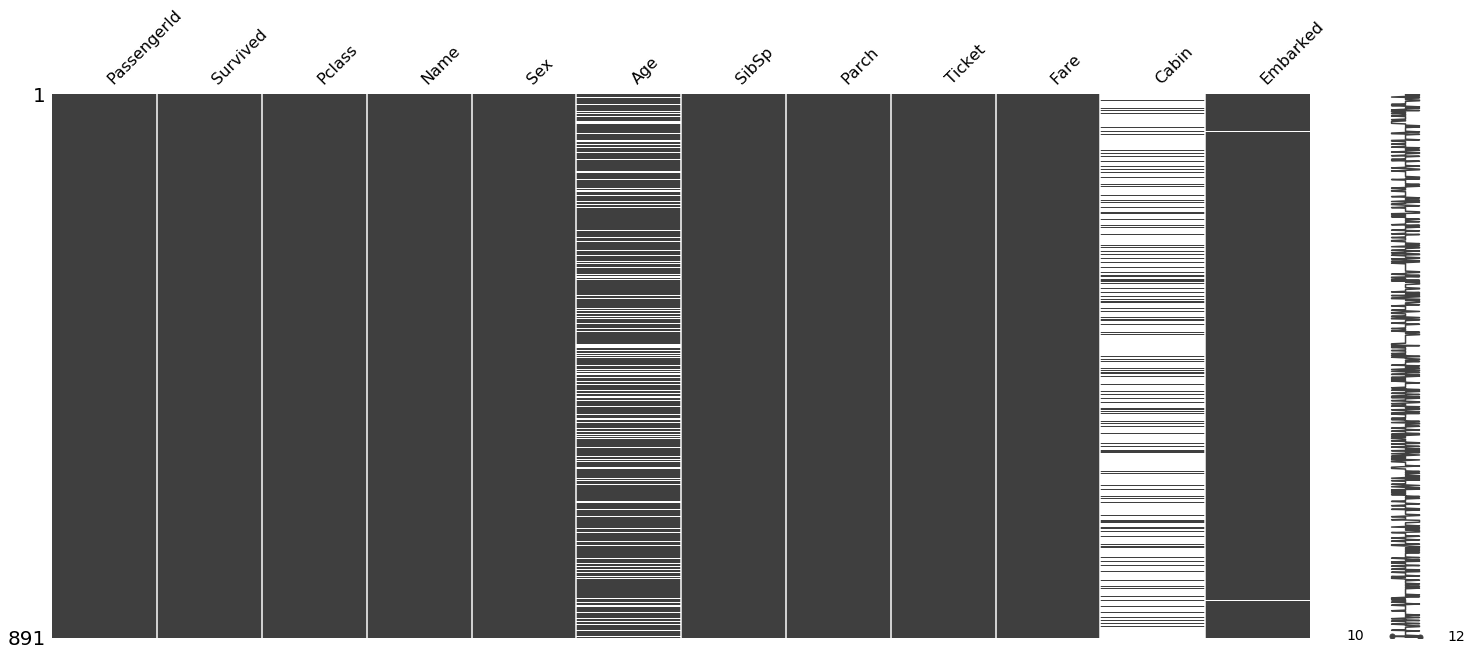

In [12]:
msno.matrix(titanic_df)

We can clearly see that Cabin indeed has a lot of missing values. There is also a bar chart on the right.It summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

We can also sample the data to only show few data points.

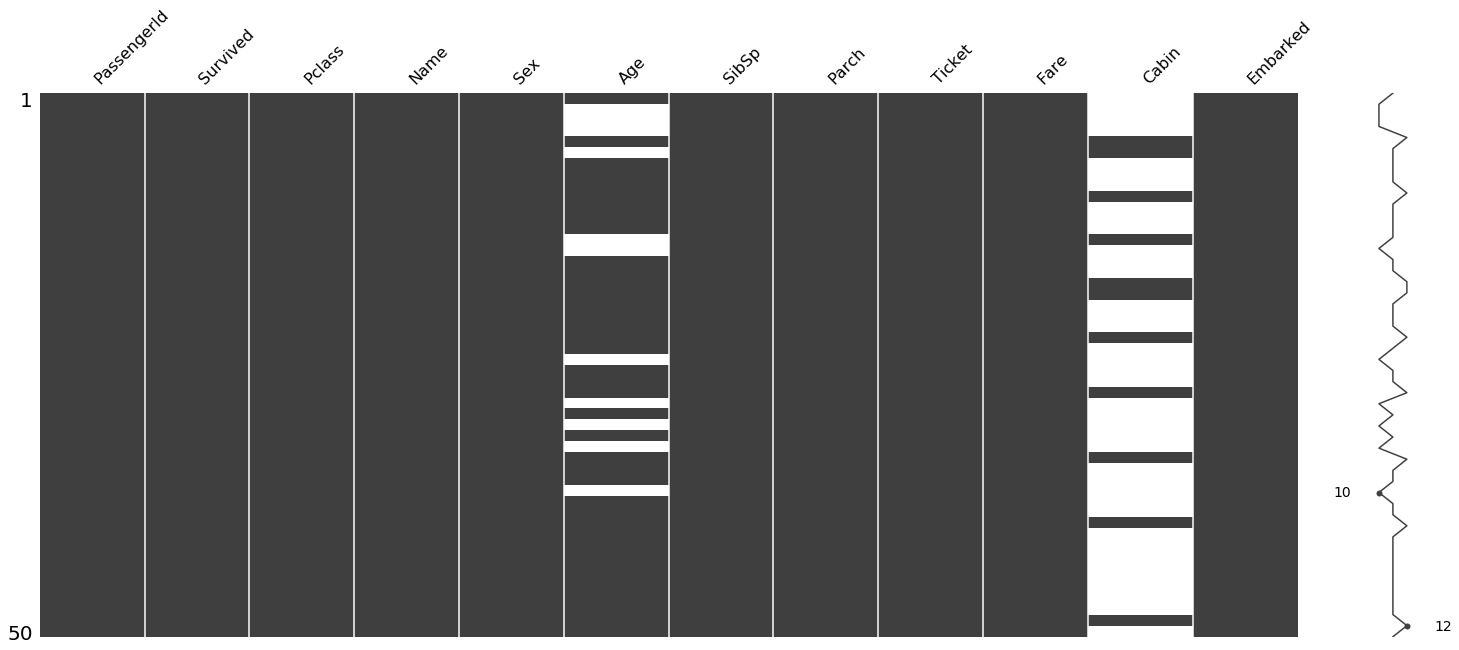

In [13]:
msno.matrix(titanic_df.sample(50))

This shows for the first 50 data points, the `Embarked` column has no missing value.

### 2.2 Bar Chart

Alternatively, you can also plot a barchart to show the missing values


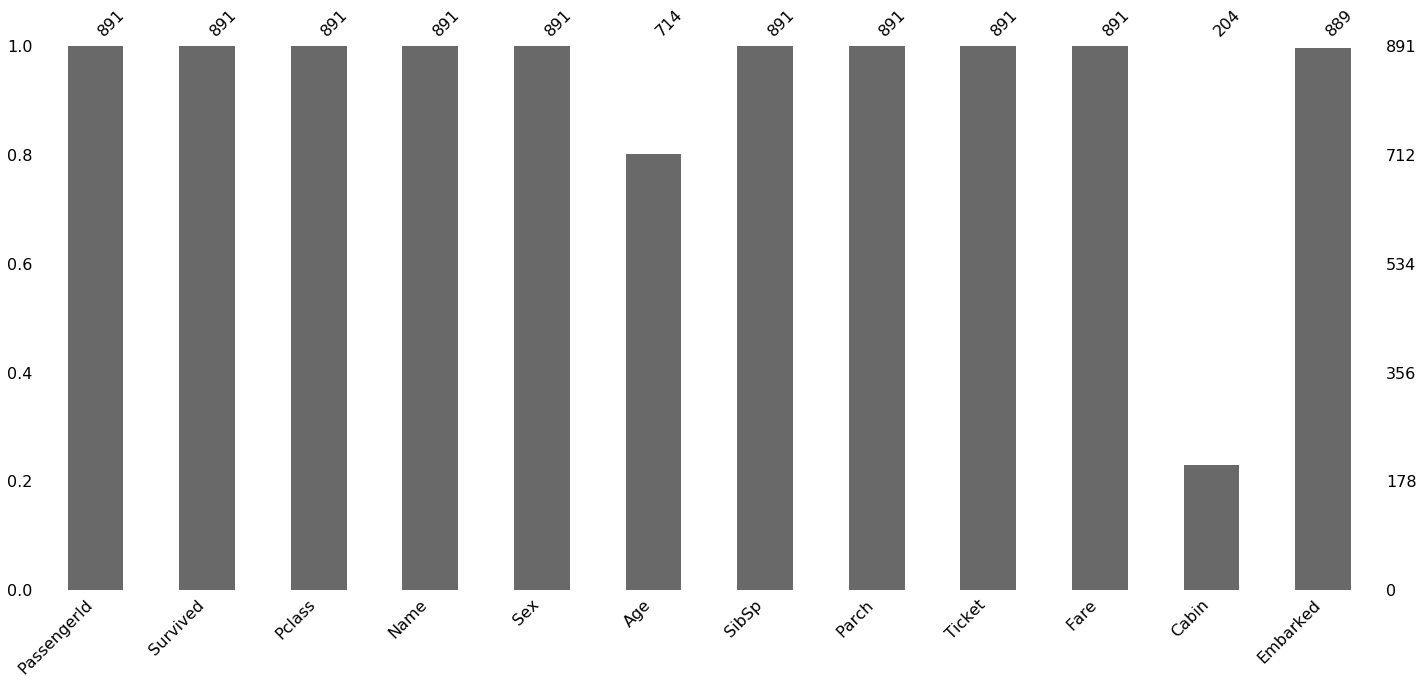

In [14]:
msno.bar(titanic_df)

### 2.3 Heatmap

[`missingno.heatmap`](https://github.com/ResidentMario/missingno#heatmap) measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

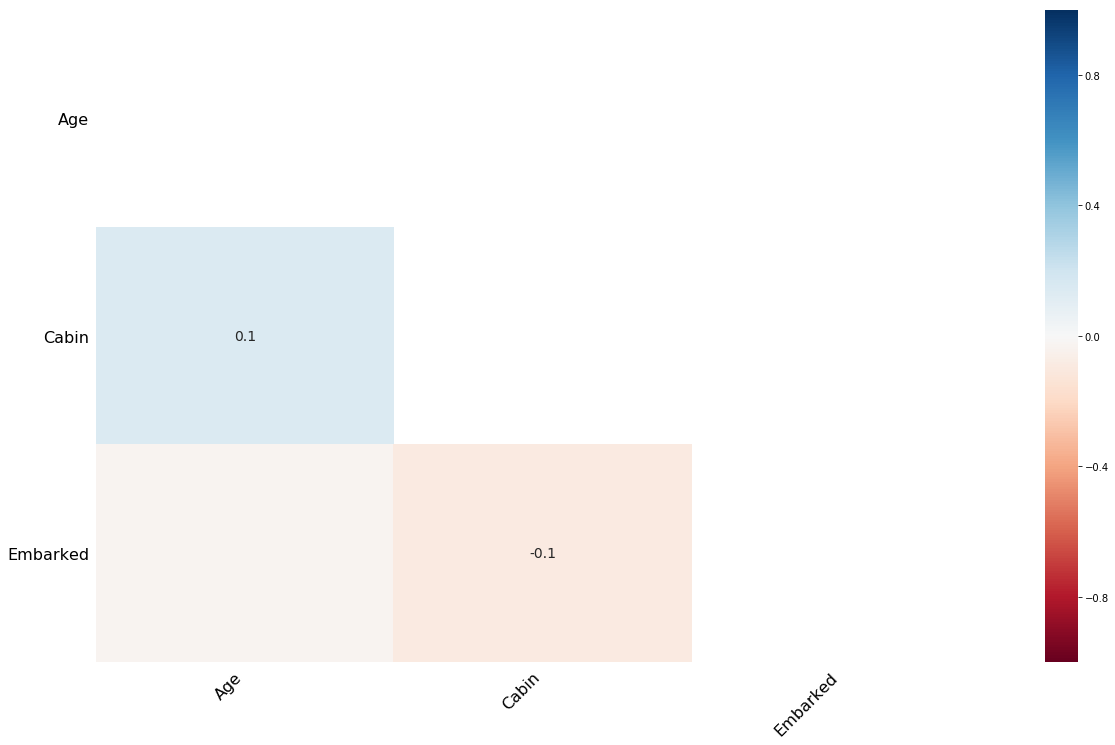

In [15]:
msno.heatmap(titanic_df)

<div class="alert alert-block alert-info">
<h1>3. Emot</h1> </div>


[Emot](https://github.com/NeelShah18/emot) is an Emoji and Emoticons detection package for Python. It can come in real handy when we have to preprocess our text data to get rid of the emoticons.

In [16]:
# installation and importing the library
!pip install emot
import emot

In [17]:
text = "The weather is ☁️, we might need to carry our ☂️ :("
emot.emoji(text)

{'value': ['☁', '☂'],
 'mean': [':cloud:', ':umbrella:'],
 'location': [[15, 15], [46, 46]],
 'flag': True}

In [18]:
emot.emoticons(text)

{'value': [':('],
 'location': [[49, 51]],
 'mean': ['Frown, sad, andry or pouting'],
 'flag': True}

<div class="alert alert-block alert-info">
<h1>4. Flashtext</h1> </div>


[Flastext](https://github.com/vi3k6i5/flashtext) lets you extract Keywords from sentence or Replace keywords in sentences.It is based on the [FlashText algorithm](https://arxiv.org/abs/1711.00046) and is considerably faster than Regular Expressions for NLP tasks.

In [19]:
# installation and importing the library
!pip install flashtext
from flashtext import KeywordProcessor

The dataset is from the competition : [Real or Not? NLP with Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started) where our job is to create a ML model to predict whether the test set tweets belong to a disaster or not, in the form of 1 or 0.This is a classic case of a Binary Classification problem.

In [20]:
twitter_df =  pd.read_csv('../input/nlp-getting-started/train.csv')
twitter_df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

Lets create a corpus of all the tweets in the training set

In [21]:
corpus = ', '.join(twitter_df.text)
corpus[:1000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, Forest fire near La Ronge Sask. Canada, All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected, 13,000 people receive #wildfires evacuation orders in California , Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school , #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires, #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas, I'm on top of the hill and I can see a fire in the woods..., There's an emergency evacuation happening now in the building across the street, I'm afraid that the tornado is coming to our area..., Three people died from the heat wave so far, Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding, #raining #flood

### 4.1 Extract Keywords or searching for words in a corpus

In [22]:
# How many times does the word 'flood' appear in the corpus?
processor = KeywordProcessor()
processor.add_keyword('flood')
found = processor.extract_keywords(corpus)
print(len(found))
  

58


### 4.2 Replacing words in a text document

In [23]:
# Replacing all occurences of word 'forest fire'(case insensitive) with fire

processor = KeywordProcessor(case_sensitive = False)
processor.add_keyword('forest fire','fire')
found = processor.replace_keywords(corpus)
print(found[:100])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, fire near La Ronge Sask. Cana


The word `Forest Fire` gets replaced with only fire. In the same way we could also replace special characters, hyperlinks etc from a document.

<div class="alert alert-block alert-info">
<h1>5. PyFlux</h1> </div>


Time series analysis is one of the most frequently encountered problems in the Machine learning domain. **[PyFlux](https://pyflux.readthedocs.io/en/latest/getting_started.html)** is an open source library in Python explicitly built for working with time series problems. The library has an excellent array of modern time series models including but not limited to ARIMA, GARCH, and VAR models. In short, PyFlux offers a probabilistic approach to time series modeling. Worth trying out.

To see how this library works, I'll be using the [NIFTY-50 Stock Market Data (2000-2019)](https://www.kaggle.com/rohanrao/nifty50-stock-market-data) dataset. The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. Let's use just stocks of just one company.

In [24]:
# installing and importing the library

!pip install pyflux

import pyflux as pf

In [25]:
maruti = pd.read_csv("../input/nifty50-stock-market-data/MARUTI.csv")
# Convert string to datetime64
maruti ['Date'] = maruti ['Date'].apply(pd.to_datetime)


### 5.1 Visualise the data

In [26]:
maruti_df = maruti[['Date','VWAP']]

#Set Date column as the index column.
maruti_df.set_index('Date', inplace=True)
maruti_df.head()


VWAP
Date              
2003-07-09  165.95
2003-07-10  166.74
2003-07-11  172.45
2003-07-14  177.91
2003-07-15  176.88

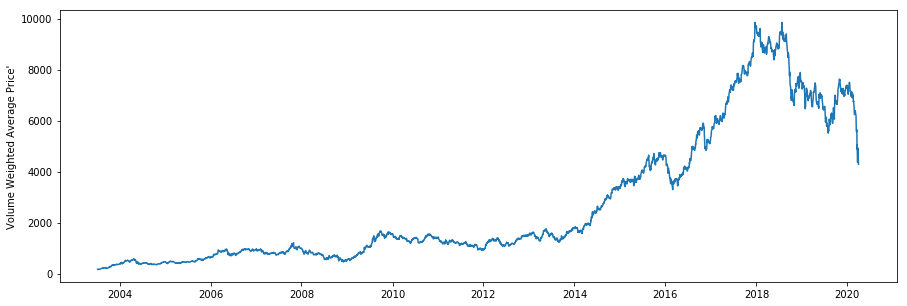

In [27]:
plt.figure(figsize=(15, 5))
plt.ylabel("Volume Weighted Average Price'")
plt.plot(maruti_df)



### 5.2 Modelling
Let's run an **ARIMA** Model. We can build an ARIMA model as follows, specifying the order of model we want, as well as a pandas DataFrame or numpy array carrying the data.

Index    Latent Variable           Prior           Prior Hyperparameters     V.I. Dist  Transform 
======== ========================= =============== ========================= ========== ==========
0        Constant                  Normal          mu0: 0, sigma0: 3         Normal     None      
1        AR(1)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
2        AR(2)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
3        AR(3)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
4        AR(4)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
5        MA(1)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
6        MA(2)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
7        MA(3)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
8        M

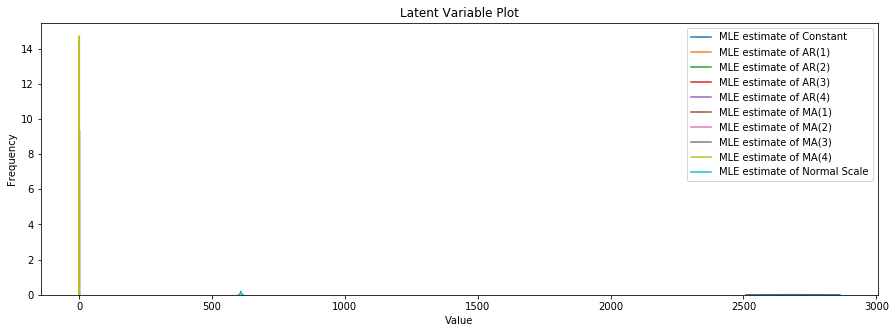

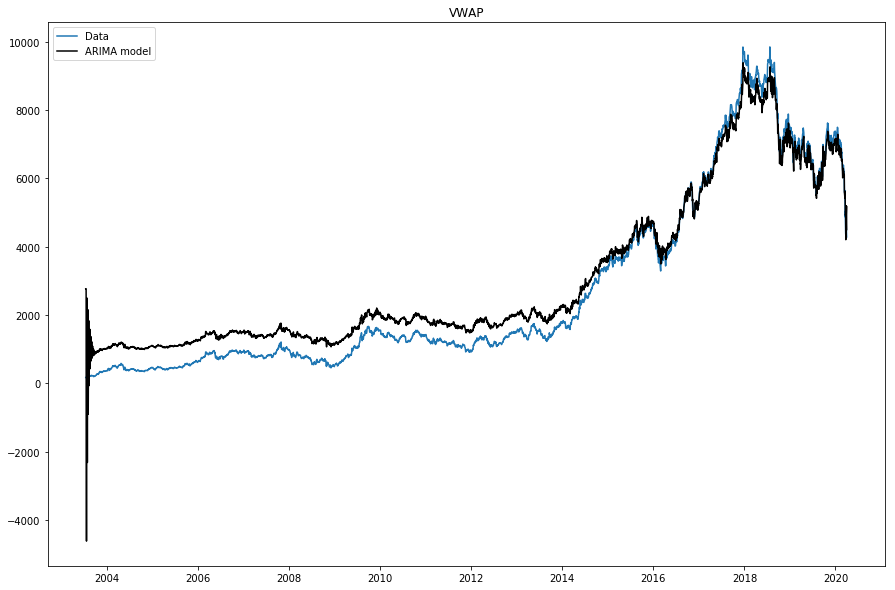

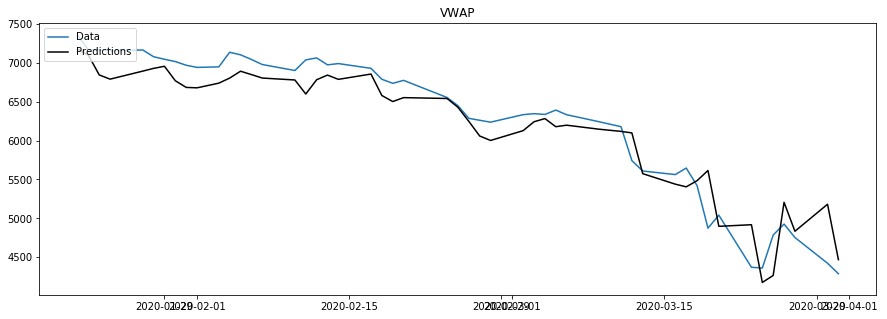

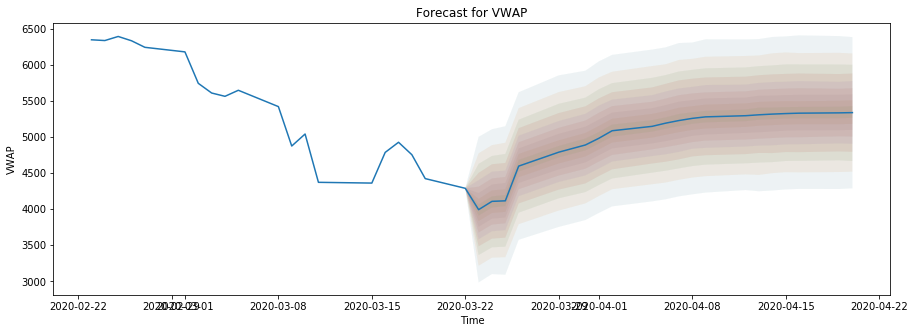

In [28]:
my_model = pf.ARIMA(data=maruti_df, ar=4, ma=4, family=pf.Normal())
print(my_model.latent_variables)

result = my_model.fit("MLE")
result.summary()

my_model.plot_z(figsize=(15,5))
my_model.plot_fit(figsize=(15,10))
my_model.plot_predict_is(h=50, figsize=(15,5))
my_model.plot_predict(h=20,past_values=20,figsize=(15,5))

<div class="alert alert-block alert-info">
<h1>6. Bamboolib</h1> </div>

**bamboolib** is a GUI for data exploration & transformation in Python Pandas. It is compatible with Jupyter Notebook and JupyterLab. Bamboolib is an otherwise closed source library but can be used for free for open data via Binder or Kaggle.  For further information on Bamboolib, please visit their  [official website](https://bamboolib.8080labs.com/).

In [29]:
# installing and importing the library

#!pip install --upgrade bamboolib>=1.2.1

After the installation, which takes some time,reload this browser page (don't press the Restart Session button). 

Try installing this library in a new kernel where it works fine(https://www.kaggle.com/tkrabel/bamboolib-titanic-df-wrangling/). It shows some error in this current kernel.

In [30]:
# Importing the necessary libraries 
#import bamboolib as bam
#bam.enable()


#Importing the training dataset
#df = pd.read_csv('../input/titanic/train.csv')
#df

Import the Titanic dataset( or any other depending on your choice)

On running the above cell, magic bamboolib button appears that looks like the image below:
![](https://cdn-images-1.medium.com/max/800/1*cviqH-lxhV1jSZbfbTFojg.png)

Click on the green `Show Bamboolib UI` button to see the various available options in the bamboolib library.


Some of the available features are:

### 6.1 Interactive UI


Interact with the pandas dataframe easily by scrolling and selecting, with a number of options.

![](https://cdn-images-1.medium.com/max/800/1*CwhOsrH-6P_5tyJ5ixq2RA.gif)

### 6.2 Split strings

Let's split the Name of the passengers into last name and first name by simply highlighting the separator with the mouse.

![](https://cdn-images-1.medium.com/max/800/1*r_9OUdxHUat7MUFwFME8dQ.gif)

### 6.3 Dropping Missing values
Easily drop the missing values

![](https://cdn-images-1.medium.com/max/800/1*UHAqeQkg4QXUbVhQta93MQ.gif)

### 6.4 Live code export

![](https://cdn-images-1.medium.com/max/800/1*PgBwE32hqJg196WxaDNFIw.gif)

### 6.5 Data Visualization
Various types of visualizations can be obtained by clicking the Visualise Dataframe, button. 

* ### Glimpse

gives an overview of all the columns, datatypes, unique and missing values
![](https://cdn-images-1.medium.com/max/800/1*9REEl9AtWDZOs54Sm0z5fA.png)

* ### Columns 
Give information about individual columns giving univariate and bivariate summaries. For instance, for the 'Survived' column, we can see the distribution which is 60 to 40. We can also look at the predictor and the best predictor for the Survived column is 'Sex' of the passenger. The visualizations are interactive and can be clicked to understand the relationships between different columns.

![](https://cdn-images-1.medium.com/max/800/1*a_s02VoSDzJLi-VBOrdYxQ.gif)

* ### Predictor patterns:

This value is obtained when each cell shows the normalized predictors score of the feature on the x-axis for the target on the y-axis.

![](https://cdn-images-1.medium.com/max/800/1*uNKRmul_KATuNLdf1u5GHQ.gif)

* ### Correlation Matrix :

![](https://cdn-images-1.medium.com/max/800/1*RLz-XZVIL06fyw3ZZQ1mRA.gif)

Some people may argue that it is better to code than use the point and click options, but this might come handy for the people who want to have a quick look at the data and get an overview instantly.


<div class="alert alert-block alert-info">
<h1>7. AutoViz</h1> </div>


[AutoViz](https://github.com/AutoViML/AutoViz) automatically visualizes any dataset, any size with a single line of code.It performs automatic visualization of any dataset with one line. Give any input file (CSV, txt or json) and AutoViz will visualize it.

To see how this library works, I'll be using the [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) dataset. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [31]:
# Installing the library
!pip install autoviz

In [32]:
# Instantiate the library
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [33]:
# Reading the dataset
house_price = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
house_price.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [34]:
sep = '\,'
target = 'SalePrice'
datapath = '../input/house-prices-advanced-regression-techniques/'
filename = 'train.csv'
df = pd.read_csv(datapath+filename,sep=sep,index_col=None)
df = df.sample(frac=1.0,random_state=42)
print(df.shape)
df.head()


(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
892    893          20       RL         70.0     8414   Pave   NaN      Reg   
1105  1106          60       RL         98.0    12256   Pave   NaN      IR1   
413    414          30       RM         56.0     8960   Pave  Grvl      Reg   
522    523          50       RM         50.0     5000   Pave   NaN      Reg   
1036  1037          20       RL         89.0    12898   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
892          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1105         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
413          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
522          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1036         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
892       2   2006        WD         Normal     154500  
1105      4   2010        WD         Normal     325000  
413       3   2010        WD         Normal     115000  
522      10   2006        WD         Normal     159000  
1036      9   2009        WD         Normal     315500  

[5 rows x 81 columns]

Shape of your Data Set: (1460, 81)
Classifying variables in data set...
    80 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6
Could not draw Time Series plots
Number of Cat and Continuous Vars exceeds 30, hence no Pivot Tables
Time to run AutoViz (in seconds) = 5.613


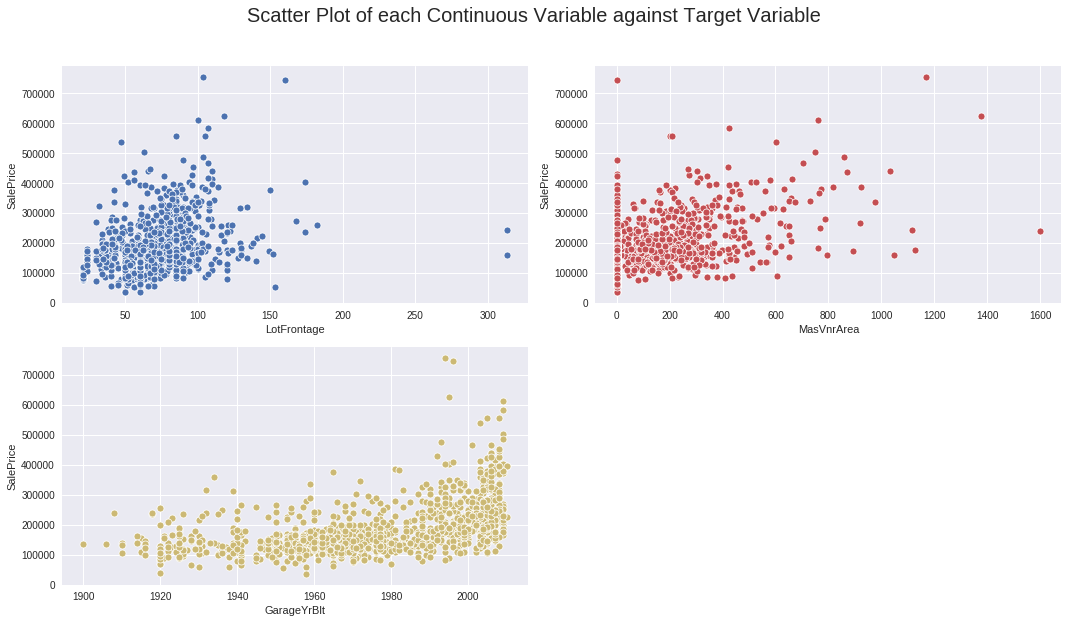

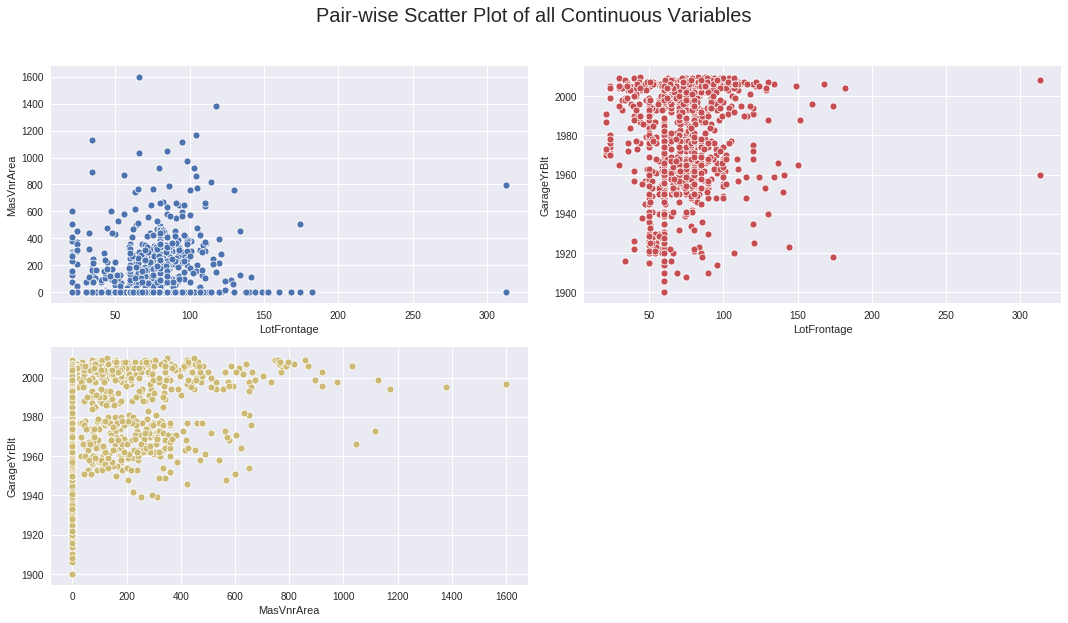

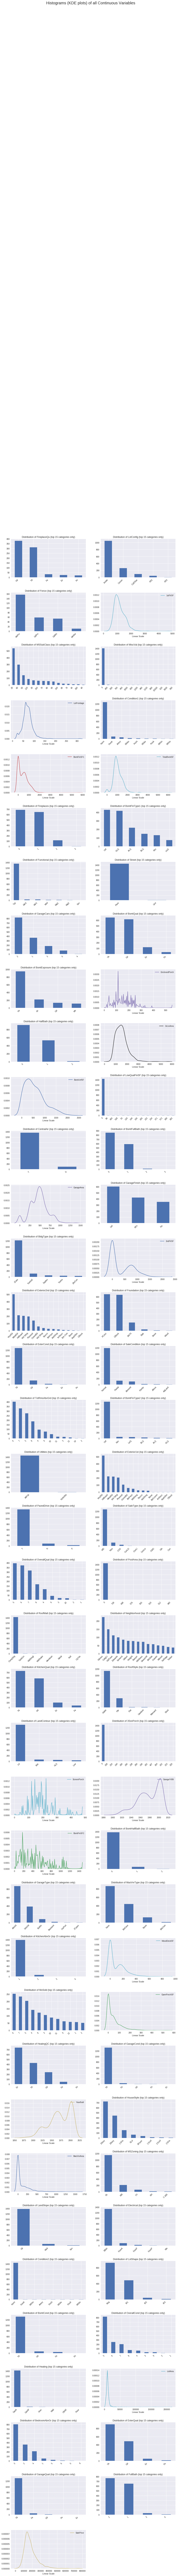

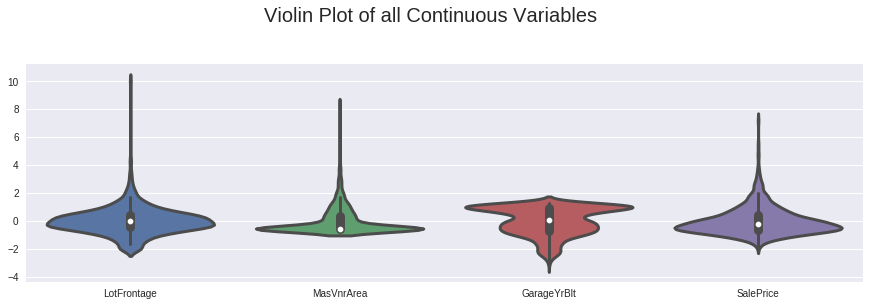

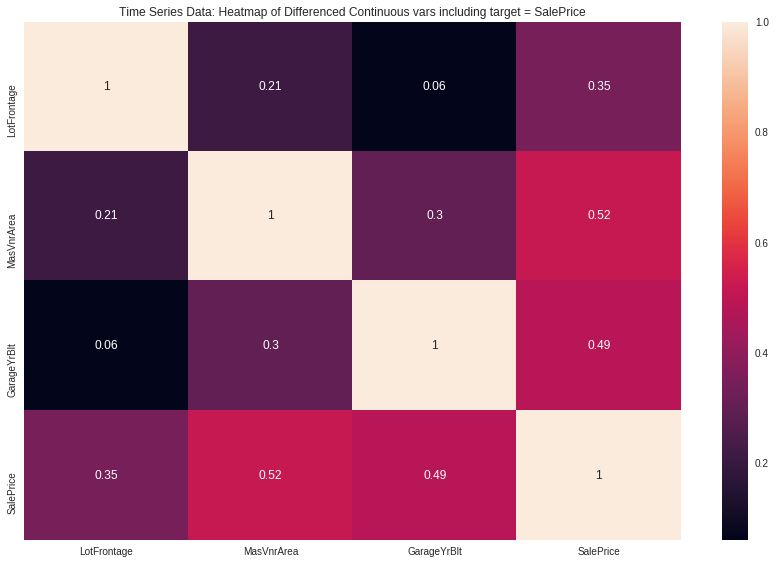

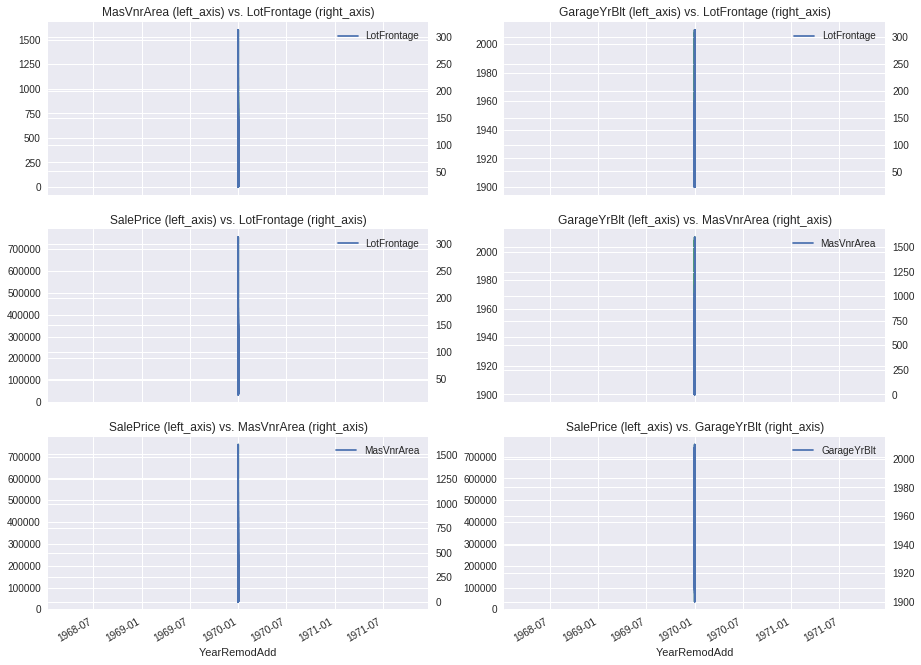

In [35]:
dft = AV.AutoViz(datapath+filename, sep=sep, depVar=target, dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=1500,max_cols_analyzed=30)

<div class="alert alert-block alert-info">
<h1>8. Numerizer</h1> </div>

[Numerizer](https://github.com/jaidevd/numerizer) is a Python module for converting natural language numbers into ints and floats. It is a port of the Ruby gem [numerizer](https://github.com/jduff/numerizer). This could be really useful when preprocessing text data.

In [36]:
!pip install numerizer

  Created wheel for numerizer: filename=numerizer-0.1.5-py2.py3-none-any.whl size=4755 sha256=8c04f8ea75ab212062cf94d9ac2daafb8dd941f0f5d07ca4f0f3f1acd6ab189d
  Stored in directory: /root/.cache/pip/wheels/35/9d/61/67576a71b17fb33c9ae6c5282dea313a73a8c53958b0514150
Successfully built numerizer


In [37]:
from numerizer import numerize
numerize('forty two')


'42'

In [38]:
numerize('forty-two')

'42'

In [39]:
numerize('four hundred and sixty two')

'462'

In [40]:
numerize('twenty one thousand four hundred and seventy three')

'21473'

In [41]:
numerize('one billion and one')

'1000000001'

In [42]:
numerize('nine and three quarters')

'9.75'

In [43]:
numerize('platform nine and three quarters')

'platform 9.75'

<div class="alert alert-block alert-info">
<h1>9. ppscore</h1> </div>

[ppscore](https://github.com/8080labs/ppscore)brought to you by the makers of Bamboolib, is a Python implementation of the Predictive Power Score (PPS). The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix).

Let us see it demo through the Titanic Dataset

In [46]:
!pip install ppscore


In [48]:
import ppscore as pps

def heatmap(df):
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax


def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title('Correlation matrix')
    return ax

### Single Predictive Power Score

How well can Sex predict the Survival probability?

In [55]:
titanic_df_subset = titanic_df[["Survived", "Pclass", "Sex", "Age", "Ticket", "Fare", "Embarked"]]
pps.score(titanic_df_subset, "Sex", "Survived")

{'x': 'Sex',
 'y': 'Survived',
 'task': 'classification',
 'ppscore': 0.5938074723855021,
 'metric': 'weighted F1',
 'baseline_score': 0.46982323232323225,
 'model_score': 0.7846461586548893,
 'model': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best')}

### PPS matrix

which predictive patterns exist between the columns?

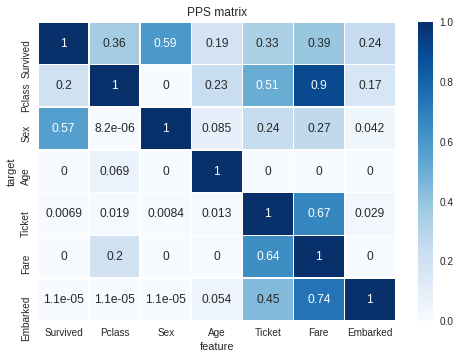

In [54]:

matrix = pps.matrix(titanic_df_subset)
heatmap(matrix)

Let's compare the PPS matrix to the basic correlation matrix

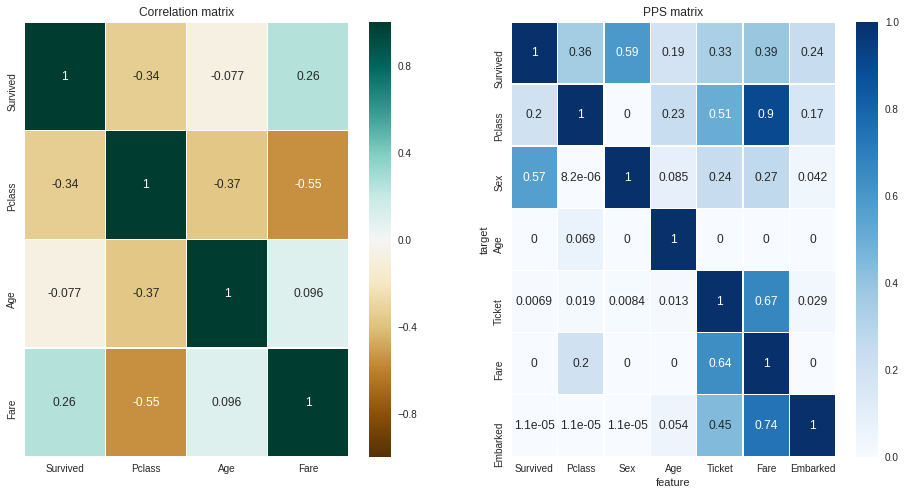

In [58]:
# Correlation Matrix
f = plt.figure(figsize=(16,8))
f.add_subplot(1,2, 1)
corr_heatmap(titanic_df_subset.corr())

f.add_subplot(1,2, 2)
matrix = pps.matrix(titanic_df_subset)
heatmap(matrix)

These were some of the interesting and  useful python libraries for data science, that I have come across recently. In case you know about others which can be added to the list, do mention them in the comments below. 